In [1]:
from IPython.display import Markdown as md
import numpy as np
import control as ctrl
import control.matlab
import lcapy as lcp
from lcapy import s
from lcapy.discretetime import z
import math            
import cmath
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':[16,9],
                     'font.size': 16, 
                     'xaxis.labellocation': 'right',
                     'yaxis.labellocation': 'top'});

def tf_control_2_lcapy(tf):
    tfout = 0;
    temp = 0;
     
    num = tf.num[0][0];
    den = tf.den[0][0];
    
    if ctrl.isctime(tf):
        for i in range(len(num)):
            tfout += num[i]*(s**(len(num)-1-i));
        
        for i in range(len(den)):
            temp += den[i]*(s**(len(den)-1-i));
        tfout /= temp;
    else:
        for i in range(len(num)):
            tfout += num[i]*(z**(len(num)-1-i));
        
        for i in range(len(den)):
            temp += den[i]*(z**(len(den)-1-i));
        tfout /= temp;
            
    return tfout;

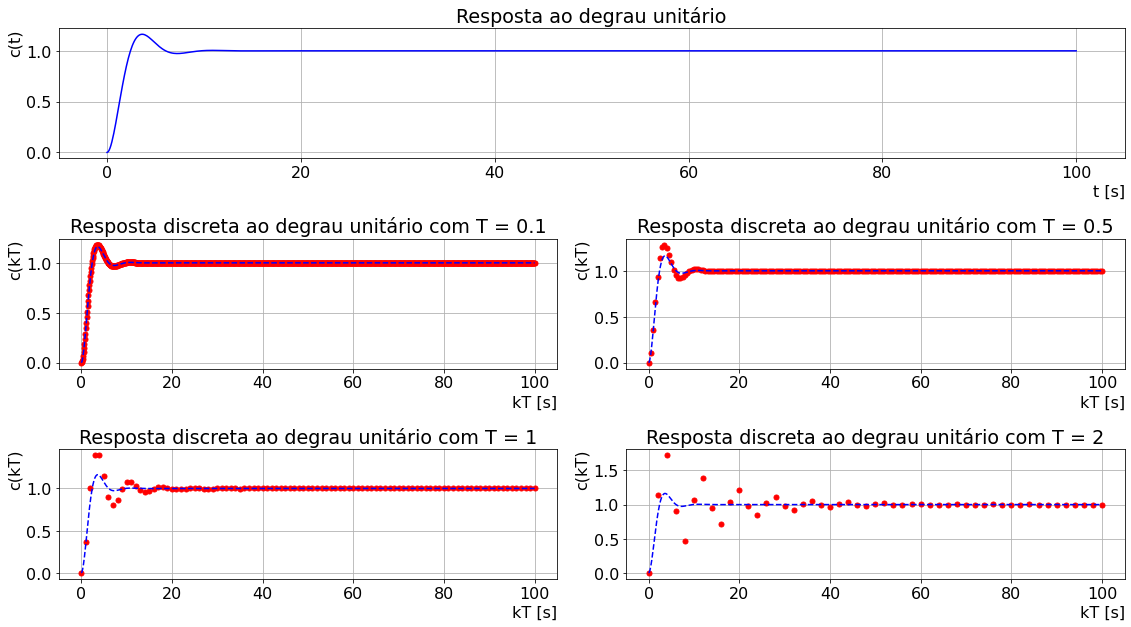

In [2]:
# Gráficos da respostas ao degrau unitário:

ck = [];
k = [];
FTMF = [];
tfinal = 100;
t = np.linspace(0, tfinal, 1001);                  

Gs = ctrl.tf(1,[1, 1, 0]);
FTMF.append(ctrl.feedback(Gs,1));
c = ctrl.step_response(FTMF[0], t)[1];

fig = plt.figure();
ax = fig.add_subplot(3, 1, 1);
ax.plot(t, c,'b');
ax.set_title("Resposta ao degrau unitário");
ax.set_xlabel("t [s]");
ax.set_ylabel("c(t)");
ax.grid();

T = [0.1, 0.5, 1, 2];
for i in range(len(T)):
    Kmax = int(tfinal/T[i]+1);
    kT = np.linspace(0, tfinal, Kmax);
    Gz = control.c2d(Gs,T[i]);
    FTMF.append(control.minreal(Gz/(1+Gz), verbose=False));                  
    ckT = ctrl.step_response(FTMF[i+1], kT)[1];
    k.append(kT.copy());
    ck.append(ckT.copy());
    
    ax = fig.add_subplot(3, 2, i+3);
    ax.plot(kT, ckT, 'ro', markersize=5);
    ax.plot(t, c, 'b--');
    ax.set_title("Resposta discreta ao degrau unitário com T = " + str(T[i]));
    ax.set_xlabel("kT [s]");
    ax.set_ylabel("c(kT)");
    ax.grid();

plt.tight_layout();
plt.show();

In [3]:
# Sobressinal percentual
Mp = [None]*5;
sobressinal = lambda x : (max(x)-x[-1])/(x[-1]-x[0])*100;

# Sobressinal percentual da resposta 'contínua':
print("Sobressinal percentual da resposta contínua:");
Mp[0] = sobressinal(c);
print("\tMp (%) = \n\t", Mp[0], '\n');

for i in range(4):
    # Sobressinal percentual das respostas discretas:
    print("Sobressinal percentual da resposta discreta de T =" + str(T[i]) + " s:");
    Mp[i+1] = sobressinal(ck[i]);
    print("\tMp = \n\t", Mp[i+1], '%\n');

Sobressinal percentual da resposta contínua:
	Mp (%) = 
	 16.297087314589746 

Sobressinal percentual da resposta discreta de T =0.1 s:
	Mp = 
	 18.37116172615717 %

Sobressinal percentual da resposta discreta de T =0.5 s:
	Mp = 
	 28.64404988694248 %

Sobressinal percentual da resposta discreta de T =1 s:
	Mp = 
	 39.9576400992148 %

Sobressinal percentual da resposta discreta de T =2 s:
	Mp = 
	 72.86825757962487 %



In [4]:
# Tempo de acomodação para 5%
ts = [None]*5;

delta = lambda x: abs((x[-1]-x)/x[-1]);
absolute_difference = lambda x, idx, percentage: abs(x[idx]-x[-1]-percentage*x[-1]);

# Tempo de acomodação de 5% para resposta 'contínua':
idx = np.argwhere(delta(c) > 0.05)[-1][0];
if absolute_difference(c,idx,0.05) < absolute_difference(c,idx+1,0.05):
    ts[0] = t[idx];
else:
    ts[0] = t[idx+1];
    
print("Tempo de acomodação para 5% da resposta contínua:");
print("\tTs (5%) = \n\t", np.around(ts[0], 2), 's\n');
    
# Tempo de acomodação de 5% para as respostas discretas:
for i in range(4):
    idx = np.argwhere(delta(ck[i]) > 0.05)[-1][0];
    if absolute_difference(ck[i],idx,0.05) < absolute_difference(ck[i],idx+1,0.05):
        ts[i+1] = k[i][idx];
    else:
        ts[i+1] = k[i][idx+1];
    
    print("Tempo de acomodação para 5% da resposta discreta de T = " + str(T[i]) + " s:");
    print("\tTs (5%) = \n\t", np.around(ts[i+1], 2), 's\n');

Tempo de acomodação para 5% da resposta contínua:
	Ts (5%) = 
	 5.3 s

Tempo de acomodação para 5% da resposta discreta de T = 0.1 s:
	Ts (5%) = 
	 5.3 s

Tempo de acomodação para 5% da resposta discreta de T = 0.5 s:
	Ts (5%) = 
	 8.0 s

Tempo de acomodação para 5% da resposta discreta de T = 1 s:
	Ts (5%) = 
	 12.0 s

Tempo de acomodação para 5% da resposta discreta de T = 2 s:
	Ts (5%) = 
	 36.0 s



Pólos da FTMF contínua:
	P = 
	 [-0.5+0.8660254j -0.5-0.8660254j] 



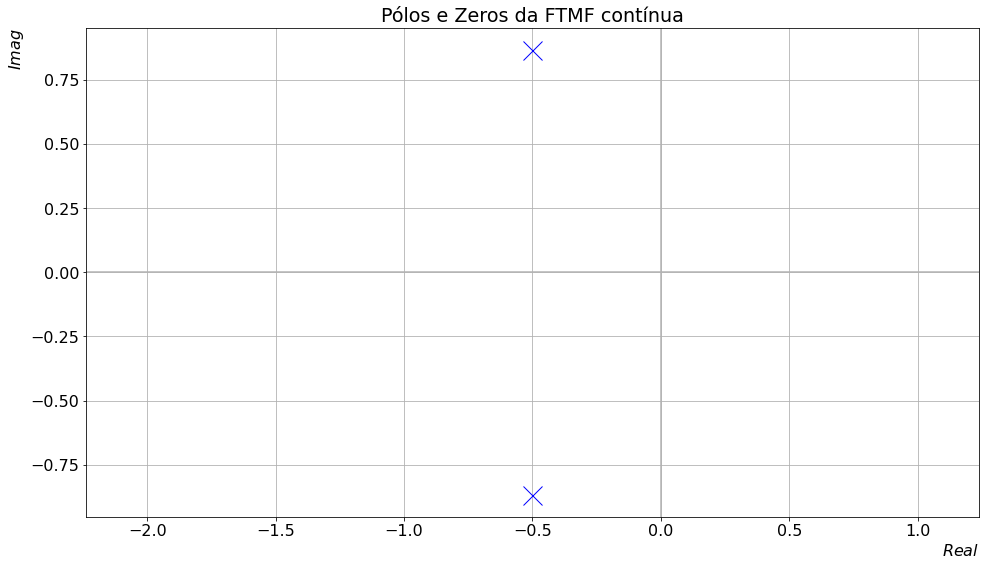

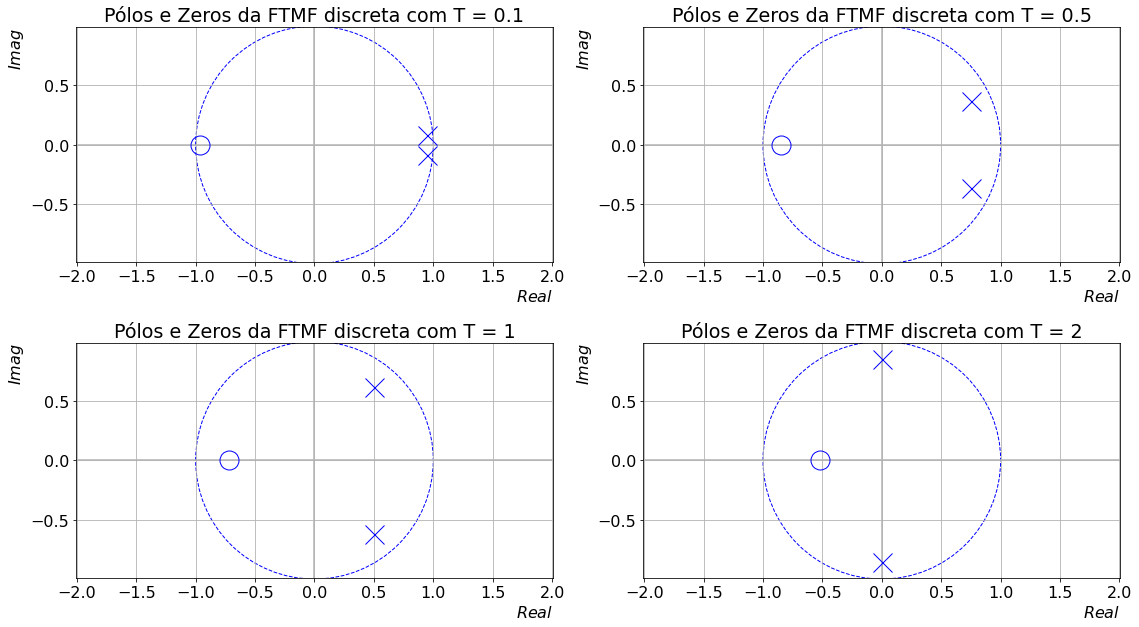

Pólos da FTMF discreta com T = 0.1 s:
	P = 
	 [0.95+0.08376311j 0.95-0.08376311j] 

Pólos da FTMF discreta com T = 0.5 s:
	P = 
	 [0.75+0.3663805j 0.75-0.3663805j] 

Pólos da FTMF discreta com T = 1 s:
	P = 
	 [0.5+0.61815901j 0.5-0.61815901j] 

Pólos da FTMF discreta com T = 2 s:
	P = 
	 [-6.24500451e-17+0.85400787j -6.24500451e-17-0.85400787j] 



In [5]:
# Pólos e zeros das FTMF contínua e discretas:

P = [];

P.append(FTMF[0].pole());
print("Pólos da FTMF contínua:");
print("\tP = \n\t", P[0], '\n');

fig = plt.figure(0);

ax = fig.add_subplot(1, 1, 1);
tf_control_2_lcapy(FTMF[0]).plot(axes=ax);
ax.set_title("Pólos e Zeros da FTMF contínua");
ax.set_xlabel("$Real$");
ax.set_ylabel("$Imag$");

fig1 = plt.figure(1);
for i in range(1,5):
    ax = fig1.add_subplot(2, 2, i);
    tf_control_2_lcapy(FTMF[i]).plot(axes=ax);
    ax.set_title("Pólos e Zeros da FTMF discreta com T = " + str(FTMF[i].dt));
    ax.set_xlabel("$Real$");
    ax.set_ylabel("$Imag$");
    ax.set_ylim([-1.1,1.1]);
    
plt.tight_layout();
plt.show();

for i in range(1,5):
    P.append(FTMF[i].pole());
    print("Pólos da FTMF discreta com T = " + str(FTMF[i].dt) + " s:");
    print("\tP = \n\t", P[i], '\n');

In [6]:
# Tabela com os valores de período de amostragem, sobressinal, tempo de acomodação de 5% e dos pólos de malha fechada:

P1, P2 = zip(*P);
tabela = reversed([x for y in zip(P2, P1, ts, Mp) for x in y]);
md("""
<style>
.rendered_html table, .rendered_html td, .rendered_html th {{
    font-size: 125%;
}}

table th:first-of-type {{
    width: 10%;
}}
table th:nth-of-type(2) {{
    width: 20%;
}}
table th:nth-of-type(3) {{
    width: 20%;
}}
table th:nth-of-type(4) {{
    width: 50%;
}}
</style>

| $\mathrm{{T}}$           | $\mathrm{{M_{{p\%}}}}$   | $\mathrm{{t_{{s \ 5 \%}}}}$    | Pólos de malha fechada |
|:------------------------:|:------------------------:|:------------------------------:|:----------------------:|
| **2 s**                  | {:.2f}                   | {:.2f}                         | ({:.4f}; {:.4f})       |
| **1 s**                  | {:.2f}                   | {:.2f}                         | ({:.4f}; {:.4f})       |
| **0,5 s**                | {:.2f}                   | {:.2f}                         | ({:.4f}; {:.4f})       |
| **0,1 s**                | {:.2f}                   | {:.2f}                         | ({:.4f}; {:.4f})       |
| **Contínuo**             | {:.2f}                   | {:.2f}                         | ({:.4f}; {:.4f})       |
""".format(*tabela))


<style>
.rendered_html table, .rendered_html td, .rendered_html th {
    font-size: 125%;
}

table th:first-of-type {
    width: 10%;
}
table th:nth-of-type(2) {
    width: 20%;
}
table th:nth-of-type(3) {
    width: 20%;
}
table th:nth-of-type(4) {
    width: 50%;
}
</style>

| $\mathrm{T}$           | $\mathrm{M_{p\%}}$   | $\mathrm{t_{s \ 5 \%}}$    | Pólos de malha fechada |
|:------------------------:|:------------------------:|:------------------------------:|:----------------------:|
| **2 s**                  | 72.87                   | 36.00                         | (-0.0000+0.8540j; -0.0000-0.8540j)       |
| **1 s**                  | 39.96                   | 12.00                         | (0.5000+0.6182j; 0.5000-0.6182j)       |
| **0,5 s**                | 28.64                   | 8.00                         | (0.7500+0.3664j; 0.7500-0.3664j)       |
| **0,1 s**                | 18.37                   | 5.30                         | (0.9500+0.0838j; 0.9500-0.0838j)       |
| **Contínuo**             | 16.30                   | 5.30                         | (-0.5000+0.8660j; -0.5000-0.8660j)       |
